In [1]:
include("./src/voronoi.jl");

  0.151473 seconds (122.62 k allocations: 5.549 MiB)


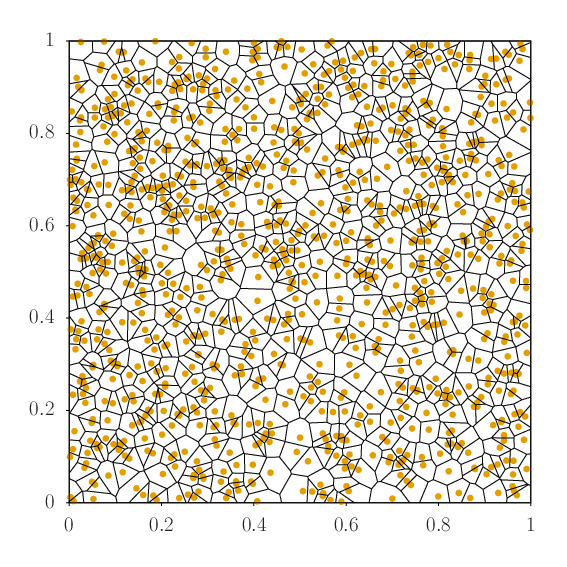

In [2]:
function test()
    sites = [Point(rand(),rand()) for i = 1:1000]
    @time edges = getVoronoiDiagram(sites)

    gp = open(`gnuplot`, "w")
    println(gp, "
        set terminal epslatex standalone lw 3\\
            font ',20' size 20cm, 20cm\\
            color background 'white';
        set output 'tmp.tex';
        set colorsequence podo;
        unset key;
        set xrange [0:1];
        set yrange [0:1];
        set tics out nomirror;
        set size ratio -1;
        plot '-' w p pt 7 ps 2 lt 2, '-' w l lt 1;
        ")
    for site in sites
        println(gp, site.x, " ", site.y)
    end
    println(gp,"e")

    for e in edges
        println(gp, e.start.x, " ", e.start.y)
        println(gp, e.finish.x, " ", e.finish.y, "\n")
    end
    close(gp)
    wait(gp.closenotify)
    run(pipeline(`latex tmp.tex`, stdout=devnull, stderr=devnull))
    run(pipeline(`dvips tmp.dvi`, stdout=devnull, stderr=devnull))
    run(pipeline(`gs -dBATCH -dNOPAUSE -sDEVICE=pngalpha
        -sOutputFile=output.png tmp.ps`, stdout=devnull, stderr=devnull))
    run(`find -x . -name tmp\* -delete`)
    display("image/png", read("output.png"))
end
test()